In [12]:
import nltk, re, numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
for pkg in ['punkt', 'stopwords', 'wordnet', 'omw-1.4', 'punkt_tab']:
    nltk.download(pkg)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [15]:
with open('./output.txt', 'r') as file:
    data = file.read()



In [18]:
words = [w.lower() for w in word_tokenize(data) if w.isalpha()]
filtered = [w for w in words if w not in set(stopwords.words('english'))]

In [19]:
lemmatized = [WordNetLemmatizer().lemmatize(w) for w in filtered]
freq = nltk.FreqDist(lemmatized)
top_words = dict(freq.most_common(40))

In [20]:
wc = WordCloud(width=1000, height=500, background_color='#0A1B27',
               colormap='Pastel1', collocations=False,
               stopwords=STOPWORDS).generate_from_frequencies(top_words)

(np.float64(-0.5), np.float64(999.5), np.float64(499.5), np.float64(-0.5))

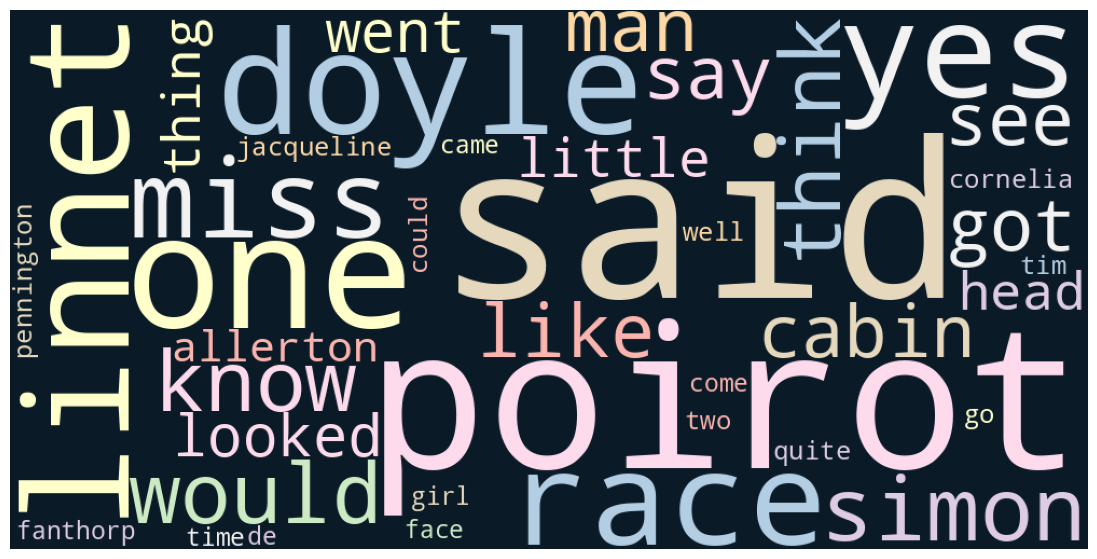

In [21]:
plt.figure(figsize=(14, 7))
plt.imshow(wc)
plt.axis("off")

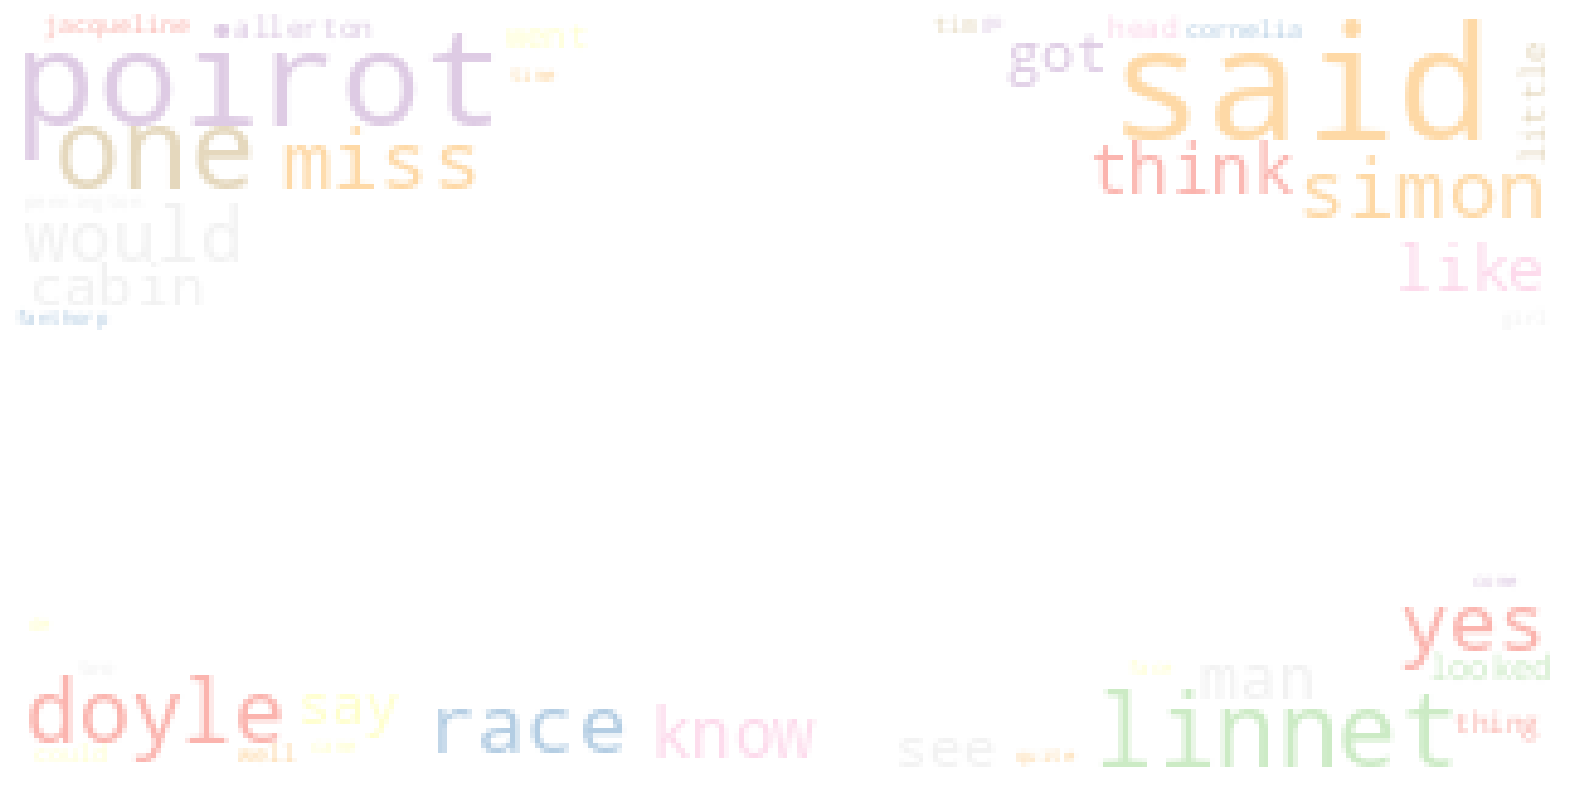

In [43]:
car_mask = np.array(Image.open("cloud2.jpeg"))
car_mask = np.where(car_mask > 128, 255, 0)

imgggg = WordCloud(
    width=1000,
    height=500,
    random_state=1,
    mask=car_mask,
    background_color=None,  # Set background to white
    colormap='Pastel1',
    mode='RGBA',
    collocations=False,
    stopwords=STOPWORDS
).generate_from_frequencies(dict(top_words))

plt.figure(figsize=(20, 15))
plt.imshow(imgggg)
plt.axis("off")
plt.show()